In [1]:
import os
os.chdir(os.path.dirname(os.getcwd()))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
keras = tf.keras
from datetime import datetime
import math

In [3]:
from typing import List

In [4]:
import os
import glob

In [5]:
from src.io.load import DataLoader

In [6]:
from abc import ABC, abstractmethod

In [7]:
import logging
from src.main import load_config,load_data
from src.preprocessing.preprocess import ProcessData

In [8]:
PATH_DATA_PROCESSED = "../data/external/day_ahead_prices/germany"

In [41]:
config_file = "1"
# Load config and data
logging.info("Load data and config..")
config_exp = load_config(config_file)

config_exp["date_start"] =  datetime.strptime(' '.join([config_exp["date_start"], config_exp["hour_begin_trade"]]), "%d-%m-%Y %H")
config_exp["date_end"] =  datetime.strptime(' '.join([config_exp["date_end"], config_exp["hour_begin_trade"]]), "%d-%m-%Y %H")

In [42]:
config_exp

{'storage_cpty': 956,
 'storage_pwr': 100,
 'rho_d': 0.86,
 'rho_s': 0.86,
 'eta': 0.7,
 't_discharge': 8,
 'balance_init_level': 1000,
 'init_storage_cpty': 0,
 'market_name': 'germany',
 'date_start': datetime.datetime(2020, 4, 1, 13, 0),
 'date_end': datetime.datetime(2020, 4, 5, 13, 0),
 'hour_begin_trade': '13',
 'alpha': 0.7,
 'period': 23,
 'n_frames': 24,
 'n_iteration': 1,
 'size_window_train': 730,
 'params': {'name_feature_builder': 'lgbm',
  'n_frames': 24,
  'n_lags_features': 168}}

In [57]:
n_days = (config_exp["date_end"] - config_exp["date_start"]).days

prices = load_data(config_exp["market_name"], end_year=config_exp["date_end"])

config_exp["n_iteration"] = math.ceil(n_days/config_exp["n_frames"])

logging.info("Process data ..")
#prices = ProcessData(df=prices).run_preprocess()
#prices = prices.to_frame("value")


#prices = prices[~prices.value.isna()]

In [44]:
prices.index.min()

Timestamp('2016-01-01 00:00:00')

In [83]:
dt = datetime(2016,1, 29, 2, 0, 0)

In [101]:
prices.loc["2016-01-29 02:00:00"]

value    18.08
Name: 2016-01-29 02:00:00, dtype: float64

In [102]:
prices[prices.index.year == 2018].sort_index()

,value
2018-01-01 00:00:00,-29.99
2018-01-01 01:00:00,-56.65
2018-01-01 02:00:00,-63.14
2018-01-01 03:00:00,-64.62
2018-01-01 04:00:00,-67.00
...,...
2018-12-30 20:00:00,54.28
2018-12-30 21:00:00,55.63
2018-12-30 22:00:00,55.00
2018-12-30 23:00:00,50.94


In [92]:
prices["day_dt"] = list(map(lambda x: x.strftime("%Y-%m-%d"), prices.index))

In [94]:
prices[prices["day_dt"] == "2018-01-01"]

,value,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_160,t_161,t_162,t_163,t_164,t_165,t_166,t_167,t_168,day_dt


In [24]:
# will become obselete
class ProcessData:
    def __init__(self, df):
        self.df = df
        
    def run_preprocess(self):
        return self.format_data()
    
    def format_data(self):
        self.df['hour'] = self.df['Hours'].apply(lambda x: x[:2])
        self.df = self.df.drop('Hours', axis=1)
        self.df['time'] = pd.to_datetime(self.df['date']+self.df['hour'], format="%d/%m/%Y%H")
        self.df = self.df.set_index('time').sort_index()
        return self.df['value'].resample("H").last().sort_index()

In [51]:
date_start = datetime(2020, 1, 1)
date_start - pd.Timedelta(days=730)

datetime.datetime(2018, 1, 1, 0, 0)

In [67]:
prices[prices.index == '2018-01-01 00:00:00']

,value,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_159,t_160,t_161,t_162,t_163,t_164,t_165,t_166,t_167,t_168


In [56]:
idx = datetime(2020, 1, 1)

In [103]:
start_date =  datetime.strptime(' '.join(["01-01-2021" , "13"]), "%d-%m-%Y %H")
size_window_train=730
start_train_date = date_start - pd.Timedelta(days=size_window_train)
print(start_train_date)
start_train_idx = np.where(prices.index == start_train_date)[0]

2018-01-01 00:00:00


In [104]:
start_train_date.strftime("%Y-%m-%d %H:%M:%S")

'2018-01-01 00:00:00'

In [106]:
prices.loc[start_train_date]

value   -29.99
Name: 2018-01-01 00:00:00, dtype: float64

## Factory

* abstract factory

In [13]:
from lightgbm import LGBMRegressor

In [14]:
class SamplerSetForecast:
    def __init__(self, 
                 df: pd.DataFrame, 
                 n_frames:int = None,
                 prop: float = 0.2,
                ):

        self.df = df
        self.n_frames = n_frames
        self.prop = prop

    def init_train_test_set(self, date_start:datetime=None, date_end:datetime=None, size_window_train=730):
        
        self.start_train_date = date_start - pd.Timedelta(days=size_window_train)
        self.start_train_idx = np.where(self.df.index == self.start_train_date)[0]
        print(type(self.start_train_date))
        print(type(date_start))
        if date_start and date_end:
            self.split_train_test_set_on_date(date_start)
            self.split_idx = np.where(self.df.index == date_start)[0]
        else:
            self.split_idx = int((1-self.prop)*len(self.df))
            self.split_train_test_set()
    
    def split_train_test_set_on_date(self, date_start):
        self.x_train, self.x_test = (
            self.df.loc[self.start_train_date:date_start, :].drop("value", axis=1), 
            self.df.loc[date_start:, :].drop("value", axis=1)
        )
        self.y_train, self.y_test = (
            self.df.loc[self.start_train_date:date_start,'value'], 
            self.df.loc[date_start:,'value']
        )

    def split_train_test_set(self):
        self.x_train, self.x_test = (
            self.df[self.start_train_idx:self.split_idx].drop("value", axis=1), 
            self.df[self.split_idx:].drop("value", axis=1)
        )
        self.y_train, self.y_test = (
            self.df[self.start_train_idx:self.split_idx]['value'], 
            self.df[self.split_idx:]['value']
        )
        
    def resample_train_test_set(self):
        self.split_idx +=self.n_frames
        self.split_train_test_set()

In [15]:
class ForecastModel(ABC):
        
    @abstractmethod
    def forecast(self, n_frames):
        pass
    
    @abstractmethod
    def train_model(self, x_train, y_train=None):
        pass
        
    def format_prediction(self, x_test: pd.Series, predictions: List):
        return pd.Series(predictions, index=x_test.index)

In [16]:
class ModelForecastFactory:

    def get_model(self, **kwargs):
        name = kwargs["name"]
        choice_model = {
            "arima":{
                "builder":ARIMAModel,
                "params":[
                    "order",
                    "seasona_order",
                ]
            },
            "lgbm":{
                "builder":LGBMForecast,
                "params":[
                ]
            }
        }
        params = {k:v for k,v in kwargs.items() if k in choice_model[name]["params"]}
        return choice_model[name]["builder"](**params)

In [17]:
class ForecastFeatureDummy:
    def create_features(self, df):
        return df

In [50]:
class ForecastFeatureFactory:
    def get_feature_builder(self, df, **kwargs):
        name_feature_builder = kwargs["name_feature_builder"]
        
        choice_feature_builder = {
            "lgbm":{
                "builder":ForecastFeatureLGBM,
                "params":[
                    "n_frames",
                    "n_lags_features"
                ]
            },
            "arima":{
                "builder":ForecastFeatureDummy,
                "params":[]
            }
        }
        params = {k:v for k,v in kwargs.items() if k in choice_feature_builder[name_feature_builder]["params"]}
        return choice_feature_builder[name_feature_builder]["builder"](**params).create_features(df)

In [51]:
class ForecastFeatureLGBM:
    def __init__(self, **params):
        self.n_frames = params["n_frames"]
        self.n_lags_features = params["n_lags_features"]
        
    def create_features(self, df):
        #self.create_temporality_features()
        df = self.create_lagged_prices_feature(df)
        return df.dropna()
    
    def create_temporality_features(self, df):
        # add season flag
        df['month'] = df.index.month
        df = self.create_weekend_feature(df)
        df = self.create_hour_feature(df)
        return df

    def create_weekend_feature(self, df):
        df['week_day'] = df.index.day_of_week+1
        df["weekend"] = np.where(df["week_day"].isin([6, 7]), 1, 0)
        return df.drop("week_day", axis=1)

    def create_lagged_prices_feature(self, df):
        for i in range(1, self.n_lags_features+1):
            df['t_{}'.format(i)] = df['value'].shift(i)
        return df
            
    def create_hour_feature(self, df):
        df["hour"] = df.index.hour
        df['hour_sin'] = np.sin(df['hour'] / 23 * 2 * np.pi)
        df['hour_cos'] = np.cos(df['hour'] / 23 * 2 * np.pi)
        return df.drop(columns='hour')

In [61]:
class LGBMForecast(ForecastModel):
    def __init__(self, **params):
        self.params = params if params else []
        self.model = (
            LGBMRegressor(self.params) 
            if self.params else LGBMRegressor()
        )

    def forecast(self, n_frames, x_test_window):
        x_input = x_test_window.iloc[0].values
        pred_day = []
    
        for _ in range(0, n_frames):
            if _ !=0:
                lags_features = [_ for _ in x_test_window.columns if _.startswith('t_')]
                other_columns = [_ for _ in x_test_window.columns if _ not in lags_features]

                tmp_lags = x_test_window[lags_features].iloc[_].values
                tmp_static = x_test_window[other_columns].iloc[_].values

                # we replace past day prices with forecasted ones
                tmp_lags[:_] = pred_day[::-1][:_]

                x_input = np.concatenate((tmp_lags, tmp_static), axis=0)
                
            last_pred = self.model.predict(x_input.reshape(1, -1))

            pred_day.append(last_pred[0])
        
        return pd.Series(pred_day, index=x_test_window.index)
        
    def train_model(self, x_train, y_train):
        self.model.fit(x_train, y_train)

## Runner

In [62]:
from src.main import load_config, load_data, Experiment

In [63]:
params = {
    "name_feature_builder":"lgbm",
    "n_frames":24,
    "n_lags_features":168
}

In [64]:
#prices = prices.loc[:pd.datetime(2021, 1, 1)].copy()

In [65]:
prices = ForecastFeatureFactory().get_feature_builder(prices, **params)
# sampler for train and test sets
sampler = SamplerSetForecast(df=prices, 
                            n_frames=config_exp["n_frames"],
                            )
model_forecast = ModelForecastFactory().get_model(name="lgbm")

/tmp/ipykernel_5139/2032915765.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['t_{}'.format(i)] = df['value'].shift(i)
/tmp/ipykernel_5139/2032915765.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['t_{}'.format(i)] = df['value'].shift(i)
/tmp/ipykernel_5139/2032915765.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

In [66]:
prices.index.min(), prices.index.max()

(Timestamp('2016-01-08 00:00:00'), Timestamp('2020-12-31 00:00:00'))

In [27]:
start_train_date = "2019-01-02 13:00:00"
date_start = "2021-01-01 13:00:00"

In [68]:
runner = ForecastRunner(model=model_forecast,
                sampler=sampler,
                 n_frames=24)

runner.sampler.init_train_test_set(
    date_start=config_exp["date_start"], 
    date_end=config_exp["date_end"],
    size_window_train=730
)

<class 'datetime.datetime'>
<class 'datetime.datetime'>


In [69]:
print(runner.sampler.x_test.shape, runner.sampler.y_test.shape)

(6564, 168) (6564,)


In [131]:
runner.sampler.x_test

,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,...,t_159,t_160,t_161,t_162,t_163,t_164,t_165,t_166,t_167,t_168
2020-04-01 13:00:00,17.30,18.25,19.35,20.27,21.97,25.50,27.96,27.21,25.43,20.76,...,21.18,24.02,24.51,28.09,34.48,34.88,27.09,19.96,17.57,18.70
2020-04-01 14:00:00,18.09,17.30,18.25,19.35,20.27,21.97,25.50,27.96,27.21,25.43,...,19.68,21.18,24.02,24.51,28.09,34.48,34.88,27.09,19.96,17.57
2020-04-01 15:00:00,19.11,18.09,17.30,18.25,19.35,20.27,21.97,25.50,27.96,27.21,...,18.39,19.68,21.18,24.02,24.51,28.09,34.48,34.88,27.09,19.96
2020-04-01 16:00:00,22.01,19.11,18.09,17.30,18.25,19.35,20.27,21.97,25.50,27.96,...,19.10,18.39,19.68,21.18,24.02,24.51,28.09,34.48,34.88,27.09
2020-04-01 17:00:00,26.90,22.01,19.11,18.09,17.30,18.25,19.35,20.27,21.97,25.50,...,18.39,19.10,18.39,19.68,21.18,24.02,24.51,28.09,34.48,34.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 20:00:00,52.38,53.60,56.32,60.00,56.08,55.61,53.95,54.07,55.63,51.95,...,4.41,9.39,1.50,-0.04,4.41,4.57,1.59,25.85,30.39,33.15
2020-12-30 21:00:00,46.88,52.38,53.60,56.32,60.00,56.08,55.61,53.95,54.07,55.63,...,16.79,4.41,9.39,1.50,-0.04,4.41,4.57,1.59,25.85,30.39
2020-12-30 22:00:00,43.22,46.88,52.38,53.60,56.32,60.00,56.08,55.61,53.95,54.07,...,19.90,16.79,4.41,9.39,1.50,-0.04,4.41,4.57,1.59,25.85
2020-12-30 23:00:00,37.43,43.22,46.88,52.38,53.60,56.32,60.00,56.08,55.61,53.95,...,30.28,19.90,16.79,4.41,9.39,1.50,-0.04,4.41,4.57,1.59


### Single run

In [72]:
pred = runner.run_forecast()

/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/lightgbm/basic.py:506: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "


In [73]:
pred.shape

(24,)

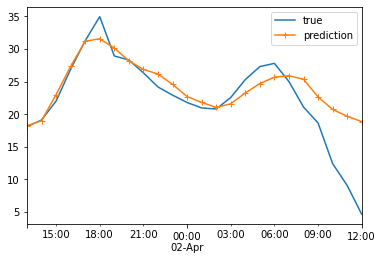

In [74]:
sampler.y_test[:24].plot(label='true')
pred.plot(label='prediction', marker='+')
plt.legend()

In [77]:
from src.action_strategy.mean_reversion import MeanReversion

In [120]:
prices = prices[~prices.index.duplicated(keep='first')]

In [121]:
prices

,value,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_159,t_160,t_161,t_162,t_163,t_164,t_165,t_166,t_167,t_168
2016-01-08 00:00:00,17.23,12.12,23.40,27.52,27.01,31.94,37.19,40.80,40.66,34.19,...,23.75,19.77,17.73,18.16,15.86,17.02,17.41,16.81,20.59,22.39
2016-01-08 01:00:00,13.90,17.23,12.12,23.40,27.52,27.01,31.94,37.19,40.80,40.66,...,26.03,23.75,19.77,17.73,18.16,15.86,17.02,17.41,16.81,20.59
2016-01-08 02:00:00,12.11,13.90,17.23,12.12,23.40,27.52,27.01,31.94,37.19,40.80,...,27.06,26.03,23.75,19.77,17.73,18.16,15.86,17.02,17.41,16.81
2016-01-08 03:00:00,12.99,12.11,13.90,17.23,12.12,23.40,27.52,27.01,31.94,37.19,...,26.59,27.06,26.03,23.75,19.77,17.73,18.16,15.86,17.02,17.41
2016-01-08 04:00:00,16.98,12.99,12.11,13.90,17.23,12.12,23.40,27.52,27.01,31.94,...,25.00,26.59,27.06,26.03,23.75,19.77,17.73,18.16,15.86,17.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 20:00:00,46.88,52.38,53.60,56.32,60.00,56.08,55.61,53.95,54.07,55.63,...,4.41,9.39,1.50,-0.04,4.41,4.57,1.59,25.85,30.39,33.15
2020-12-30 21:00:00,43.22,46.88,52.38,53.60,56.32,60.00,56.08,55.61,53.95,54.07,...,16.79,4.41,9.39,1.50,-0.04,4.41,4.57,1.59,25.85,30.39
2020-12-30 22:00:00,37.43,43.22,46.88,52.38,53.60,56.32,60.00,56.08,55.61,53.95,...,19.90,16.79,4.41,9.39,1.50,-0.04,4.41,4.57,1.59,25.85
2020-12-30 23:00:00,38.54,37.43,43.22,46.88,52.38,53.60,56.32,60.00,56.08,55.61,...,30.28,19.90,16.79,4.41,9.39,1.50,-0.04,4.41,4.57,1.59


In [122]:
strategy = MeanReversion(prices=prices,
                            period=config_exp["period"],
                            alpha=config_exp["alpha"],
                            )

In [123]:
pred_prices = pred.to_frame("value")

In [124]:
strategy.get_indicator(
                x_train=runner.sampler.y_train,
                x_test=runner.sampler.y_test
            )

In [125]:
pred_prices.shape

(24, 1)

In [130]:
results = strategy.get_action_window(pred_prices)

In [129]:
strategy.prices

,value,mean,std,upper_bollinger,lower_bollinger
2018-04-02 13:00:00,21.82,21.820000,NaN,NaN,NaN
2018-04-02 14:00:00,22.88,22.350000,0.749533,22.874673,21.825327
2018-04-02 15:00:00,25.10,23.266667,1.673838,24.438353,22.094980
2018-04-02 16:00:00,34.11,25.977500,5.591269,29.891388,22.063612
2018-04-02 17:00:00,37.66,28.314000,7.123404,33.300383,23.327617
...,...,...,...,...,...
2020-12-30 20:00:00,46.88,46.873913,9.947297,53.837021,39.910805
2020-12-30 21:00:00,43.22,47.484348,9.216038,53.935575,41.033121
2020-12-30 22:00:00,37.43,47.457391,9.245747,53.929414,40.985369
2020-12-30 23:00:00,38.54,47.567391,9.117523,53.949658,41.185125


In [128]:
strategy.prices = strategy.prices[~strategy.prices.index.duplicated(keep='first')]

In [114]:
pred_prices['value']

2020-04-01 13:00:00    18.232494
2020-04-01 14:00:00    18.998250
2020-04-01 15:00:00    23.003689
2020-04-01 16:00:00    27.338447
2020-04-01 17:00:00    31.200611
2020-04-01 18:00:00    31.569103
2020-04-01 19:00:00    30.161206
2020-04-01 20:00:00    28.188608
2020-04-01 21:00:00    26.874876
2020-04-01 22:00:00    26.164804
2020-04-01 23:00:00    24.584460
2020-04-02 00:00:00    22.708744
2020-04-02 01:00:00    21.805138
2020-04-02 02:00:00    21.036462
2020-04-02 03:00:00    21.601595
2020-04-02 04:00:00    23.265639
2020-04-02 05:00:00    24.703672
2020-04-02 06:00:00    25.681138
2020-04-02 07:00:00    25.900641
2020-04-02 08:00:00    25.367130
2020-04-02 09:00:00    22.647855
2020-04-02 10:00:00    20.729807
2020-04-02 11:00:00    19.685435
2020-04-02 12:00:00    18.860507
Name: value, dtype: float64

In [85]:
pred_prices['buy'] = (
        np.where(
            pred_prices['value'] <= strategy.prices.loc[pred_prices.index, 'lower_bollinger'], 
            1, 0,
            )
    )

ValueError: Can only compare identically-labeled Series objects

### Multi run

In [264]:
n_days=30
n_frames=24

runner = ForecastRunner(model=model_forecast,
                sampler=sampler,
                 n_frames=24)

runner.sampler.init_train_test_set(
    date_start=config_exp["date_start"], 
    date_end=config_exp["date_end"],
    size_window_train=730
)

In [266]:
pred_period = []

runner.run_training()
idx_period = []

for i in range(n_days):

    runner.run_training()
    pred_day = runner.run_forecast()
    idx_period.extend(runner.sampler.y_test[:n_frames].index)
    runner.sampler.resample_train_test_set()
    pred_period.append(pred_day)
    
pred_period = pd.concat(pred_period)

/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/lightgbm/basic.py:506: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/lightgbm/basic.py:506: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/lightgbm/basic.py:506: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/lightgbm/basic.py:506: UserWarning: Usage of np.nd

/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/lightgbm/basic.py:506: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/lightgbm/basic.py:506: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "


In [267]:
runner.sampler.y_test 

time
2021-05-21 08:00:00    37.57
2021-05-21 09:00:00    22.45
2021-05-21 10:00:00    13.99
2021-05-21 11:00:00     0.67
2021-05-21 12:00:00    -9.47
                       ...  
2021-12-31 19:00:00     0.18
2021-12-31 20:00:00     0.08
2021-12-31 21:00:00     5.10
2021-12-31 22:00:00     6.32
2021-12-31 23:00:00    50.05
Name: value, Length: 5392, dtype: float64

In [268]:
len(idx_period)

720

In [269]:
prices.loc[idx_period]["value"]

time
2021-04-21 08:00:00    51.68
2021-04-21 09:00:00    57.81
2021-04-21 10:00:00    49.39
2021-04-21 11:00:00    46.87
2021-04-21 12:00:00    43.36
                       ...  
2021-05-21 03:00:00    20.99
2021-05-21 04:00:00    51.14
2021-05-21 05:00:00    65.00
2021-05-21 06:00:00    66.22
2021-05-21 07:00:00    53.41
Name: value, Length: 720, dtype: float64

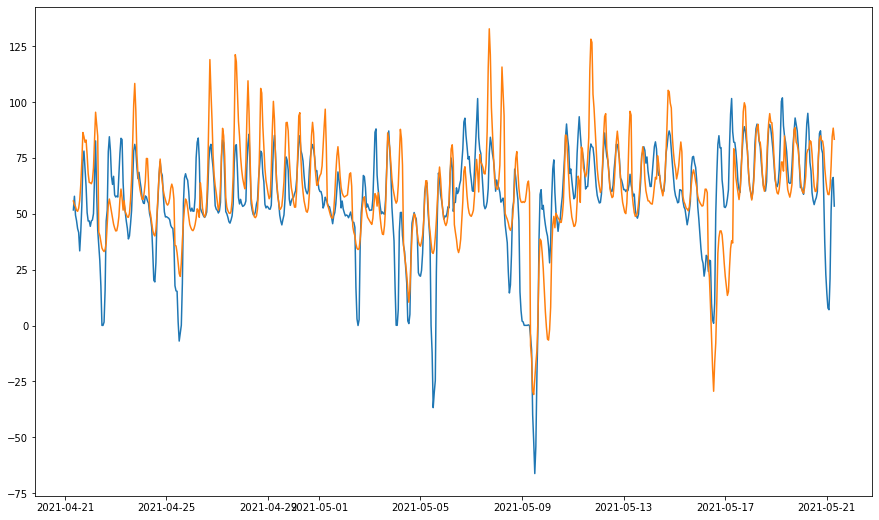

In [270]:
plt.figure(figsize=(15, 9))
n_hours_forecast = n_days*n_frames
plt.plot(prices.loc[idx_period]["value"])
plt.plot(pred_period)

In [261]:
runner.sampler.x_test

,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,...,t_159,t_160,t_161,t_162,t_163,t_164,t_165,t_166,t_167,t_168
time,,,,,,,,,,,,,,,,,,,,,
2020-10-24 00:00:00,31.94,29.84,36.58,38.45,35.84,43.60,53.79,53.89,49.83,46.95,...,43.53,45.92,48.08,46.22,41.08,37.35,36.91,35.59,36.26,36.59
2020-10-24 01:00:00,33.01,31.94,29.84,36.58,38.45,35.84,43.60,53.79,53.89,49.83,...,41.97,43.53,45.92,48.08,46.22,41.08,37.35,36.91,35.59,36.26
2020-10-24 02:00:00,26.32,33.01,31.94,29.84,36.58,38.45,35.84,43.60,53.79,53.89,...,37.77,41.97,43.53,45.92,48.08,46.22,41.08,37.35,36.91,35.59
2020-10-24 03:00:00,25.59,26.32,33.01,31.94,29.84,36.58,38.45,35.84,43.60,53.79,...,36.03,37.77,41.97,43.53,45.92,48.08,46.22,41.08,37.35,36.91
2020-10-24 04:00:00,23.95,25.59,26.32,33.01,31.94,29.84,36.58,38.45,35.84,43.60,...,36.10,36.03,37.77,41.97,43.53,45.92,48.08,46.22,41.08,37.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,32.49,40.01,60.97,62.23,20.49,25.49,10.02,10.01,10.05,0.93,...,125.31,135.00,162.22,184.07,157.15,180.25,248.85,274.33,267.03,250.00
2021-12-31 20:00:00,0.18,32.49,40.01,60.97,62.23,20.49,25.49,10.02,10.01,10.05,...,128.03,125.31,135.00,162.22,184.07,157.15,180.25,248.85,274.33,267.03
2021-12-31 21:00:00,0.08,0.18,32.49,40.01,60.97,62.23,20.49,25.49,10.02,10.01,...,142.46,128.03,125.31,135.00,162.22,184.07,157.15,180.25,248.85,274.33


In [78]:
sampler.y_train.shape

(15000,)

In [79]:
sampler.y_test[:24]

time
2020-10-01 00:00:00    31.18
2020-10-01 01:00:00    29.75
2020-10-01 02:00:00    31.10
2020-10-01 03:00:00    34.04
2020-10-01 04:00:00    43.58
2020-10-01 05:00:00    52.25
2020-10-01 06:00:00    55.05
2020-10-01 07:00:00    51.13
2020-10-01 08:00:00    48.68
2020-10-01 09:00:00    40.28
2020-10-01 10:00:00    33.70
2020-10-01 11:00:00    32.92
2020-10-01 12:00:00    34.66
2020-10-01 13:00:00    36.77
2020-10-01 14:00:00    40.46
2020-10-01 15:00:00    49.55
2020-10-01 16:00:00    52.59
2020-10-01 17:00:00    53.18
2020-10-01 18:00:00    49.82
2020-10-01 19:00:00    41.00
2020-10-01 20:00:00    38.39
2020-10-01 21:00:00    35.90
2020-10-01 22:00:00    32.09
2020-10-01 23:00:00    32.90
Name: value, dtype: float64

In [ ]:
model_forecast

#### changes in code

* sampler

In [30]:
class ForecastRunner:
    def __init__(self,
                model: ForecastModel,
                n_frames: int,
                sampler: SamplerSetForecast,):
        self.model = model
        self.n_frames=n_frames
        self.sampler = sampler
    
    def init_sampler(self, df):
        return SamplerSetForecast(df)        
    
    def run_forecast(self):
        return self.model.forecast(n_frames=self.n_frames, 
                                   x_test_window=self.sampler.x_test[:self.n_frames])
    
    def run_training(self):
        self.model.train_model(self.sampler.x_train, self.sampler.y_train)
    
    def run_sequential_window(self, n_periods):
        pred_list: List[pd.Series] = []
        self.sampler = self.init_sampler()
        for idx in range(1, (n_periods*self.n_frames)+1):
            if idx % self.frames == 0:
                self.sampler.resample_train_test_set(self.n_frames)
                self.run_training(self.sampler.x_train)
                pred_list.append(self.run_forecast(self.n_frames))
                
        return pd.concat(pred_list, axis=0)

## Utils

In [31]:
from typing import Dict

In [32]:
class Scaler:
    def __init__(self):
        pass
    

In [33]:
class ProcessTimeSeries:
    def __init__(self):
        pass
    def differential_signal(self, df):
        pass

In [34]:
class ARIMAModel(ForecastModel):
    def __init__(self,
                 order:Dict[str, int],
                seasonal_order:float = None):
        
        self.order = order
        self.seasonal_order = seasonal_order
        
    def forecast(self, n_frames):
        return self.model.forecast(steps=n_frames)
    
    def train_model(self, x_train):
        self.model = ARIMA(
            endog=x_train, 
            order=(self.order["p"], self.order["d"], self.order["q"]), 
            freq='H', 
            seasonal_order=self.seasonal_order).fit()

## Runner

In [22]:
builder = DataLoader()
data = builder.load_dataset("germany", start_date=None, end_date=None)

processor = ProcessData(data)
prices = processor.run_preprocess()

params = {
    "name":"arima",
    "order":dict(p=24, d=1, q=0),
    "seasonal_order":None,
}

model_builder = ModelForecastFactory()
model_forecast = model_builder.get_model(**params)


In [68]:
48%48

0

In [32]:
runner = ForecastRunner(model=model_forecast,
                  df=prices,
                 n_frames=24)

sampler = runner.init_sampler()

### Single run

In [47]:
%%time
runner.run_training(
    x_train=sampler.x_train
)


TypeError: run_training() got an unexpected keyword argument 'x_train'

In [246]:
pred = runner.run_forecast(
    n_frames=48)

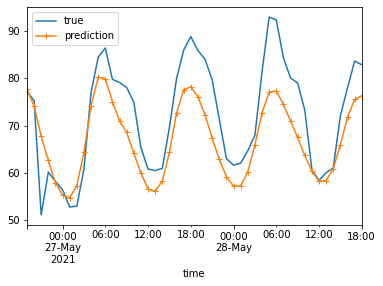

In [247]:
sampler.x_test[:48].plot(label='true')
pred.plot(label='prediction', marker='+')
plt.legend()

### Multi run

In [33]:
%%time
runner.run_sequential_window(n_frames=24, n_periods=4)

0
24
48
72
CPU times: user 16min 58s, sys: 28 s, total: 17min 26s
Wall time: 2min 10s


2021-05-26 19:00:00    77.703895
2021-05-26 20:00:00    74.141760
2021-05-26 21:00:00    67.673109
2021-05-26 22:00:00    62.589246
2021-05-26 23:00:00    57.846837
                         ...    
2021-05-27 14:00:00    58.207403
2021-05-27 15:00:00    64.326371
2021-05-27 16:00:00    72.673452
2021-05-27 17:00:00    77.531713
2021-05-27 18:00:00    78.244235
Name: predicted_mean, Length: 96, dtype: float64

In [ ]:
%%time
n_forecast = 24
n_curr_window = int(0.2*len(prices_s))
n_stop = 168
pred_list = []
for idx in range(n_stop):
    if idx % n_forecast == 0:
        self.sampler.resample()
        model_arima = arima_uni_var_fit(prices_s[:n_curr_window], p=24, d=1, q=0)
        pred_list.append(arima_uni_var_predict(model_arima, n_forecast))
    n_curr_window +=1

In [ ]:

class

In [73]:
from enum import Enum, auto

class TradeAction(Enum):
    BUY = 1
    SELL = -1
    HOLD = 0

In [71]:
trade_action = {
    1:TradeAction.BUY,
    0:TradeAction.HOLD,
    -1:TradeAction.SELL,
}

## Tests

In [7]:
from src.main import Experiment
from src.action_strategy.factory import ActionStrategy
from src.action_strategy.mean_reversion import MeanReversion
from src.forecast.factory import ModelForecastFactory
from src.forecast.runner import ForecastRunner
from src.forecast.utils import SamplerSetForecast
from src.io.load import DataLoader, load_config
from src.preprocessing.preprocess import ProcessData
from src.stock import Balance, Stock
import pandas as pd
import logging
from src.trade_manager import TradeManagerV0

In [8]:
from typing import Any

In [9]:
from src.main import dummy_func

In [16]:
log=logging.getLogger(__name__)
log.setLevel(logging.DEBUG)

In [11]:
import os
os.chdir(os.path.dirname(os.getcwd()))

In [12]:

def load_data(name="germany"):
    builder = DataLoader()
    return builder.load_dataset(name, start_date=None, end_date=None)



In [124]:
test = forecast_runner.sampler.x_test.tail()

In [125]:
df = forecast_runner.sampler.x_test

In [136]:
df.loc[test.index].rename("rr")

time
2021-12-31 19:00:00     0.18
2021-12-31 20:00:00     0.08
2021-12-31 21:00:00     5.10
2021-12-31 22:00:00     6.32
2021-12-31 23:00:00    50.05
Freq: H, Name: rr, dtype: float64

In [153]:
for i, _ in test.items():
    print(_)

0.18
0.08
5.1
6.32
50.05


In [176]:
from dataclasses import dataclass, field

from src.action_strategy.factory import trade_action, TradeAction

@dataclass
class TradeManagerV0:
    strategy: ActionStrategy
    forecast_runner: ForecastRunner

    def trade_on_period(self):
        pass

    def run_trade(self, exp):
        self.forecast_runner.run_training()
        pred_prices = self.forecast_runner.run_forecast()
        pred_prices = pred_prices.to_frame("value")
        #return pred_prices
        results = self.strategy.get_action_window(pred_prices)

        for _,s_price in results.iterrows():
            self.trade_unit(s_price, exp)
        
        return results
        
    def trade_unit(self, s_price: pd.Series, exp):

        exp.stock.update_stock(s_price['action'])
        exp.balance.update_balance(s_price['action'], s_price['true_prices'])
        log.info(f"Current cpty : {exp.stock.current_cpty}")
        log.info(f"Current balance : {exp.balance.current_level}")


@dataclass
class Experiment:
    """ run experiment"""
    stock: Stock
    df: pd.DataFrame
    forecast_runner: ForecastRunner
    strategy: ActionStrategy
    balance: Balance
    

    def run(self):

        self.manager = TradeManagerV0(strategy=self.strategy,
                                forecast_runner=self.forecast_runner,
                                     )
        
        return self.manager.run_trade(self)
        

@dataclass
class MeanReversion(ActionStrategy):
    prices: pd.Series
    period: int
    alpha:float

    def get_indicator(self, prices):
        """bollinger bands"""
        prices = prices.to_frame()
        prices["mean"] = prices["value"].rolling(self.period, min_periods=1).mean()
        prices["std"] = prices["value"].rolling(self.period, min_periods=1).std()
        
        prices["upper_bollinger"] = prices["mean"] + (self.alpha * prices["std"])
        prices["lower_bollinger"] = prices["mean"] - (self.alpha * prices["std"])
        return prices

    def get_action_window(self, window_prices):

        self.prices = self.get_indicator(self.prices)
        window_prices['buy'] = (
            np.where(
                window_prices['value'] >= self.prices.loc[window_prices.index, 'upper_bollinger'], 
                1, 0,
                )
        )
        window_prices['sell'] = (
            np.where(
                window_prices['value'] <= self.prices.loc[window_prices.index, 'lower_bollinger'],
             -1, 0,
             )
        )
        window_prices['action'] = window_prices[['buy', 'sell']].sum(axis=1).map(trade_action)
        
        window_prices = window_prices.rename({"value":"pred_prices"}, axis=1) 
        true_prices = self.prices.loc[window_prices.index].rename({"value":"true_prices"}, axis=1)
        results = pd.concat([true_prices, window_prices], axis=1)

        return results
    
@dataclass
class Balance:
    init_level: float

    def __post_init__(self):
        self.init_balance()

    def init_balance(self):
        self.current_level = self.init_level

    def update_balance(self, action: str, price: float):
        transaction = {
            TradeAction.BUY.name: -1,
            TradeAction.SELL.name: 1,
            TradeAction.HOLD.name: 0,
        }
        #log.info(f"ACTION : {action}")
        self.current_level += transaction[action]*price
        return self


@dataclass
class Stock:
    storage_pwr: float
    rho_d: float
    rho_s: float
    t_discharge: float
    init_storage_cpty: float = 0
    current_cpty: float = field(init=False)
    storage_cpty: float = field(init=False)

    def __post_init__(self):
        self.init_stock()

    def init_stock(self):
        self.storage_cpty = int(self.storage_pwr*(self.t_discharge/self.rho_d))
        self.current_cpty = self.init_storage_cpty
    
    def update_stock(self, action: str):
        log.info(f"action Stock : {action}")
        if action == TradeAction.BUY.name:
            self.add_to_stock()
        elif action == TradeAction.SELL.name:
            self.retrieve_from_stock()
        log.info(f"Updated Stock : {self.current_cpty}")
        return self

    @property
    def is_empty(self):
        return self.current_cpty == 0
    
    @property
    def is_full(self):
        return self.current_cpty == self.storage_cpty

    def add_to_stock(self):
        qty = (
            min(
                (self.storage_cpty - self.current_cpty), 
                (self.storage_pwr*self.rho_s*1)
            )
        if not self.is_full else 0)
        log.info('---')
        log.info(f'current : {self.current_cpty} - action qty : {qty}')
        log.info('---')        
        self.current_cpty += qty
        

    def retrieve_from_stock(self):
        qty = (
            min(
                self.current_cpty, 
                (self.storage_pwr/self.rho_d*1)
            )
        if not self.is_empty else 0)
        log.info('---')
        log.info(f'current : {self.current_cpty} - action qty : -{qty}')
        log.info('---')
        self.current_cpty -= qty



In [187]:
2**(24)

16777216

In [188]:
2**10

1024

In [177]:
market_name = "germany"
config_file = "1"
window_predict = ("01-01-2017", "03-01-2017")
log.info("Load data and config..")

config_exp = load_config(config_file)
prices = load_data(market_name)
log.info("Process data ..")
prices = ProcessData(df=prices).run_preprocess()
log.info("Init classes..")

INFO:__main__:Load data and config..
INFO:__main__:Process data ..
INFO:__main__:Init classes..


In [198]:
@dataclass
class A:
    tr:str
        
@dataclass
class B:
    aa: A
    rd:int

In [199]:
a=A("re")
b=B(aa=a, rd=4)

In [200]:
a.tr = 'uuuu'

In [201]:
b.aa.tr

'uuuu'

In [179]:
stock = Stock(storage_pwr=config_exp["storage_pwr"], 
                rho_d=config_exp["rho_d"], 
                rho_s=config_exp["rho_s"],
                t_discharge=config_exp["t_discharge"],
                )
balance = Balance(init_level=config_exp["balance_init_level"])
sampler = SamplerSetForecast(df=prices, prop=0.2)

model_forecast = ModelForecastFactory().get_model(**{
                                    "name":"arima",
                                    "order":dict(p=24, d=1, q=0),
                                    "seasonal_order":None,
                                    })
log.info("Init forecast runner..")

forecast_runner = ForecastRunner(model=model_forecast,
                            n_frames=config_exp["n_frames"],
                            sampler=sampler,
                            )    

strategy = MeanReversion(prices=prices,
                    period=config_exp["period"],
                    alpha=config_exp["alpha"],
                    )

INFO:__main__:Init forecast runner..


In [180]:
config_exp

{'storage_cpty': 956,
 'storage_pwr': 100,
 'rho_d': 0.86,
 'rho_s': 0.86,
 'eta': 0.7,
 't_discharge': 8,
 'balance_init_level': 1000,
 'alpha': 0.7,
 'period': 23,
 'n_frames': 24}

In [181]:
exp = Experiment(stock=stock, 
                df=sampler.df,
                forecast_runner=forecast_runner,
                strategy=strategy,
                balance=balance,
                )

In [182]:
%%time
results = exp.run()

INFO:__main__:action Stock : BUY
INFO:__main__:---
INFO:__main__:current : 0 - action qty : 86.0
INFO:__main__:---
INFO:__main__:Updated Stock : 86.0
INFO:__main__:Current cpty : 86.0
INFO:__main__:Current balance : 922.74
INFO:__main__:action Stock : HOLD
INFO:__main__:Updated Stock : 86.0
INFO:__main__:Current cpty : 86.0
INFO:__main__:Current balance : 922.74
INFO:__main__:action Stock : HOLD
INFO:__main__:Updated Stock : 86.0
INFO:__main__:Current cpty : 86.0
INFO:__main__:Current balance : 922.74
INFO:__main__:action Stock : HOLD
INFO:__main__:Updated Stock : 86.0
INFO:__main__:Current cpty : 86.0
INFO:__main__:Current balance : 922.74
INFO:__main__:action Stock : SELL
INFO:__main__:---
INFO:__main__:current : 86.0 - action qty : -86.0
INFO:__main__:---
INFO:__main__:Updated Stock : 0.0
INFO:__main__:Current cpty : 0.0
INFO:__main__:Current balance : 980.89
INFO:__main__:action Stock : SELL
INFO:__main__:---
INFO:__main__:current : 0.0 - action qty : -0
INFO:__main__:---
INFO:__ma

CPU times: user 4min 43s, sys: 10.4 s, total: 4min 53s
Wall time: 37.3 s


In [183]:
results

,true_prices,mean,std,upper_bollinger,lower_bollinger,pred_prices,buy,sell,action
2021-05-26 19:00:00,77.26,65.807391,11.174083,73.629250,57.985533,77.703895,1,0,BUY
2021-05-26 20:00:00,75.28,66.237391,11.346258,74.179772,58.295011,74.141760,0,0,HOLD
2021-05-26 21:00:00,51.08,65.795217,11.740764,74.013752,57.576682,67.673109,0,0,HOLD
2021-05-26 22:00:00,60.13,66.028696,11.563396,74.123073,57.934318,62.589246,0,0,HOLD
2021-05-26 23:00:00,58.15,66.294783,11.293902,74.200514,58.389051,57.846837,0,-1,SELL
2021-05-27 00:00:00,56.37,66.521739,11.024974,74.239221,58.804258,55.209097,0,-1,SELL
2021-05-27 01:00:00,52.71,66.540435,11.000062,74.240478,58.840392,54.708143,0,-1,SELL
2021-05-27 02:00:00,52.90,66.243043,11.281141,74.139842,58.346245,57.219816,0,-1,SELL
2021-05-27 03:00:00,60.75,65.550435,11.098774,73.319577,57.781293,64.285478,0,0,HOLD
2021-05-27 04:00:00,77.00,65.220435,10.608968,72.646712,57.794157,74.204812,1,0,BUY


In [206]:
results = pd.read_excel('results/20220920_213512/results.xlsx', index_col=0)

In [207]:
results.head()

,true_prices,mean,std,upper_bollinger,lower_bollinger,pred_prices,buy,sell,action
2021-05-26 19:00:00,77.26,65.807391,11.174083,73.629250,57.985533,77.703895,0,-1,SELL
2021-05-26 20:00:00,75.28,66.237391,11.346258,74.179772,58.295011,74.141760,0,0,HOLD
2021-05-26 21:00:00,51.08,65.795217,11.740764,74.013752,57.576682,67.673109,0,0,HOLD
2021-05-26 22:00:00,60.13,66.028696,11.563396,74.123073,57.934318,62.589246,0,0,HOLD
2021-05-26 23:00:00,58.15,66.294783,11.293902,74.200514,58.389051,57.846837,1,0,BUY


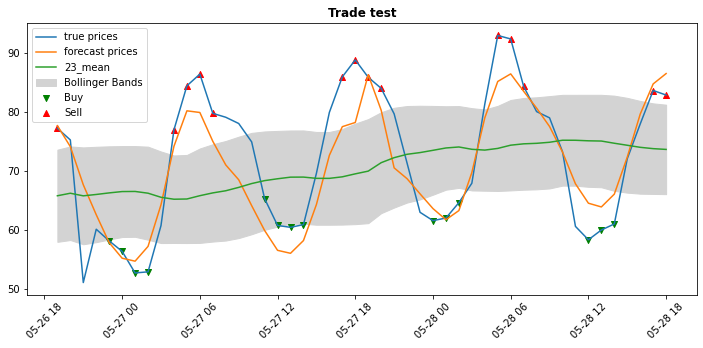

In [208]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=45)

plt.plot(results.index, results.true_prices, label = 'true prices')
plt.plot(results.index, results.pred_prices, label = 'forecast prices')

plt.plot(results.index, results["mean"], label = '23_mean')
plt.fill_between(results.index, results['upper_bollinger'], results['lower_bollinger'], label = 'Bollinger Bands', color='lightgrey')

plt.scatter(results[(results['action'] == "BUY")].index, results[(results['action'] == "BUY")]['true_prices'], label = 'Buy', marker='v', c='g')
plt.scatter(results[(results['action'] == "SELL")].index, results[(results['action'] == "SELL")]['true_prices'], label = 'Sell', marker='^', c='r')

plt.title('Trade test', fontweight="bold")
plt.legend()
plt.show()

* alpha as signal saisonality coef

In [23]:
365*30

10950

In [24]:
10950/60

182.5